# Лабораторная работа №6 
***Выполнил студент группы А-05-20 Ходосевич Л.Н.***  
**Вариант 24**

# Задача 6.1
Требуется  исследовать поведение погрешностей при численном дифференцировании.  


In [92]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.integrate 
import pandas as pd
sns.set_theme()

## Пункт 1
Данная функция : $f'(x) = af(x) + bf(x + 10h) + cf(x - 7h) + df(x + 2h)$   
1.Определить коэффициенты a, b, c, d так, чтобы формула имела максимальный порядок точности.  
2.  Реализовать программно полученную формулу численного дифференцирования и формулу правой разностной производной.   
3. В качестве тестовой функции для проверки корректности работы программы взять функцию из задачи 5.1. На отрезке [a,b]   построить графики точной производной и полученные по формулам  численного дифференцирования, выбрав шаг  h0=0.0001 .


Определяем коэфициенты в формуле численного дифференцирования:

In [93]:
h = 0.0001 
matrix = np.array(
[
    [1, 1, 1, 1],
    [0, 10*h, -7*h, 2*h],
    [0, 100/2*h**2, 49/2*h**2, 4/2*h**2],
    [0, 1000/6*h**3, -343/6*h**3, 8/6*h**3]
]
)
neded = [0, 1, 0, 0]
coefs = np.linalg.solve(matrix, neded)

In [94]:
print(f"Полученные коэфициенты: {coefs}")

Полученные коэфициенты: [-4571.42857143  -102.94117647  -186.74136321  4861.11111111]


Функция из 5.1:  
$P_n(x) = 6.6 - 3.7x - 8.4x^2 + 5.5x^3 + x^4$

Далее строим три функции расчета, самой функции, ее производной, полученной аналитически,  
а так же формулы численного дифференцирования с полученными коэфициентами и левой разностной производной.

In [95]:
def func(x):
    return 6.6 - 3.7*x - 8.4*x**2 + 5.5*x**3 + x**4
def true_der(x):
    return -3.7 - 16.8*x + 16.5*x**2 + 4*x**3
def counted_der(x, coeficients, h):
    return coeficients[0]*func(x) + coeficients[1]*func(x + 10*h) + \
        coeficients[2]*func(x - 7*h) + coeficients[3]*func(x + 2*h)
def left_(x, h):
    return (func(x + h) - func(x))/h

In [96]:
a, b = 1, 3
n = int((b - a)/h)
x = np.linspace(a, b, n)

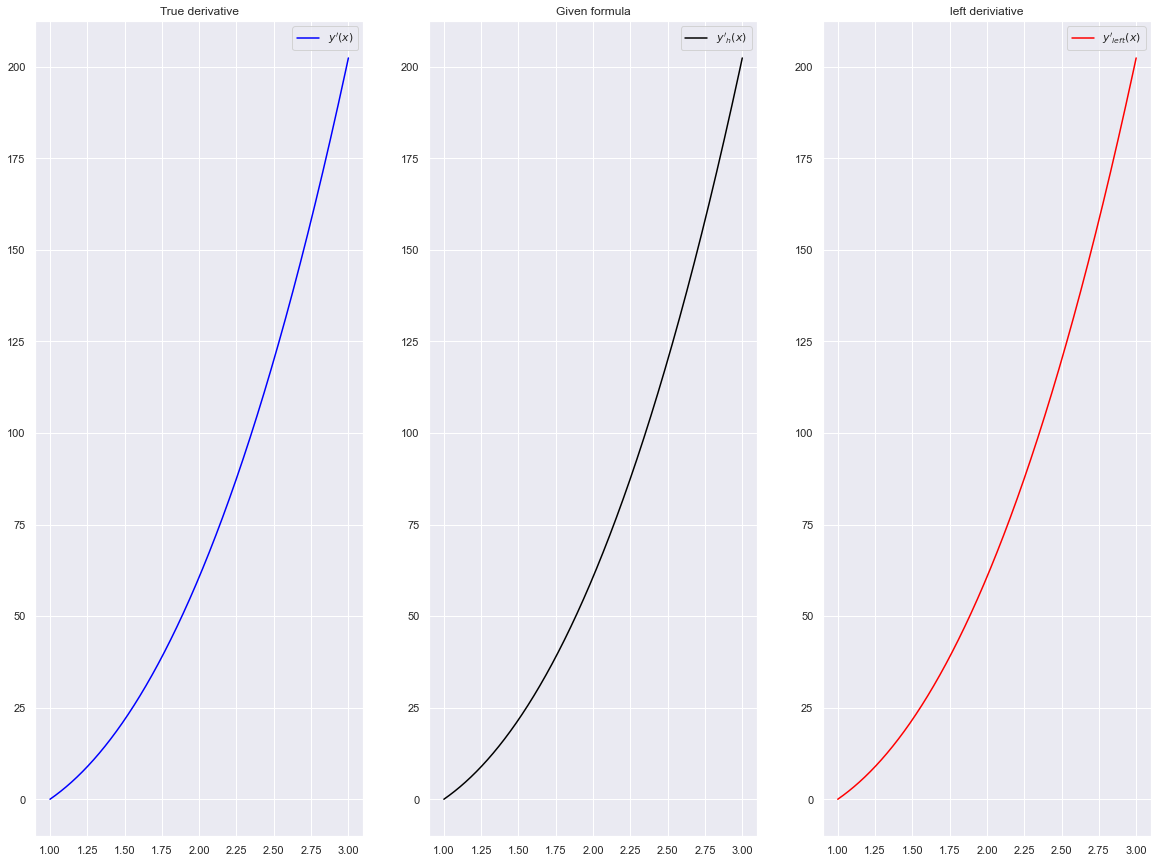

In [97]:
fig, ax = plt.subplots(1,3,figsize=(20,15))

ax[0].plot(x, true_der(x), c='blue', label="$ y'(x)$")
ax[1].plot(x, counted_der(x, coefs, h), c='black', label="$ y'_{h}(x)$")
ax[2].plot(x, left_(x, h), c='red', label="$y'_{left}(x)$")

ax[0].set_title("True derivative")
ax[1].set_title("Given formula")
ax[2].set_title("left deriviative")

ax[0].legend()
ax[1].legend()
ax[2].legend()

In [98]:
print("Максимальные отклонения от настоящей производной на отрезке [a, b]")
print("Левая разностная производная :", np.abs(left_(x, h) - true_der(x)).max())
print("Данная формула :", np.abs(counted_der(x, coefs, h) - true_der(x)).max())

Максимальные отклонения от настоящей производной на отрезке [a, b]
Левая разностная производная : 0.009510175698437706
Данная формула : 5.452989171317313e-10


## Пункт 2
4. Выбрать фиксированную точку на отрезке [a,b] и вычислить значения производных  по формулам  численного дифференцирования,    уменьшая шаг дифференцирования  h0=0.1 последовательно в 10 раз:  , k=0,1,2,…  
Найти оптимальное значение шага дифференцирования для каждой формулы численного дифференцирования.  
По полученным данным построить графики погрешностей.
  
В качестве функции возьмет ту, которую использовале в пункте 1, в качестве точки на которой будем вести расчеты - 1

In [99]:
x = np.array([1])
h = 10**(-4)
h_list = []
left_list = []
my_list = []
for i in range(1, 10):
    h = 10**(-i)
    h_list.append(h)
    matrix = np.array(
    [
        [1, 1, 1, 1],
        [0, 10*h, -7*h, 2*h],
        [0, 100/2*h**2, 49/2*h**2, 4/2*h**2],
        [0, 1000/6*h**3, -343/6*h**3, 8/6*h**3]
    ]
    )
    neded = [0, 1, 0, 0]
    coefs = np.linalg.solve(matrix, neded)
    my_list.append((coefs[0]*func(x) + coefs[1]*func(x + 10*h) + coefs[2]*func(x - 7*h) + 
                    coefs[3]*func(x + 2*h) - true_der(x))[0])
    left_list.append((left_(x, h) - true_der(x))[0])
h_list = np.array(h_list)
left_list = np.array(left_list)
my_list = np.array(my_list)

In [100]:
df = pd.DataFrame()
df['Шаг h'] = h_list
df['Разница для данного метода'] = my_list
df['Разница для левой разностной производной'] = left_list
df

,Шаг h,Разница для данного метода,Разница для левой разностной производной
0,1.000000e-01,-1.400000e-01,1.506000e+00
1,1.000000e-02,-1.400000e-04,1.419510e-01
2,1.000000e-03,-1.399998e-07,1.410950e-02
3,1.000000e-04,-1.427907e-10,1.410095e-03
4,1.000000e-05,-7.275958e-12,1.410010e-04
5,1.000000e-06,3.492460e-10,1.409939e-05
6,1.000000e-07,-9.313226e-09,1.398881e-06
7,1.000000e-08,1.490116e-08,6.661338e-08
8,1.000000e-09,0.000000e+00,0.000000e+00


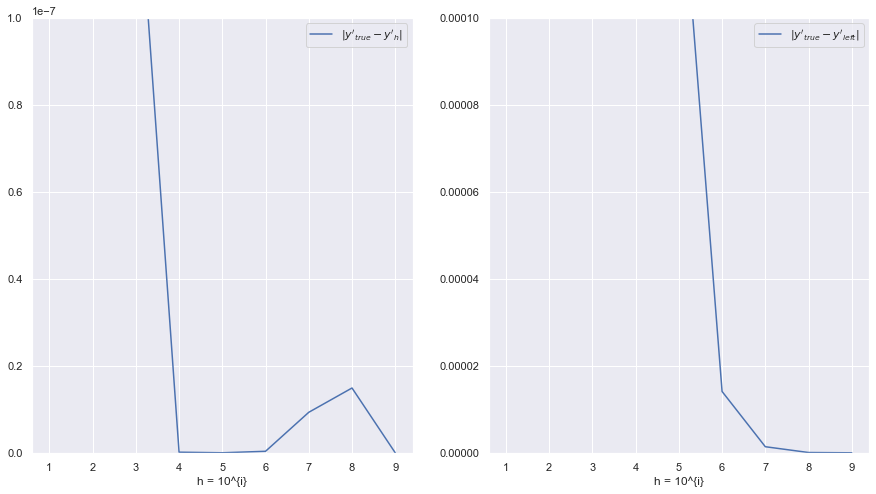

In [101]:
fig, ax = plt.subplots(1,2, figsize=(15,8))

ax[0].plot(np.arange(9) + 1, abs(my_list), label="$|y'_{true} - y'_h|$")
ax[0].set_ylim(0, 10**-7)
ax[0].set_xlabel("h = 10^{i}")
ax[0].legend()

ax[1].plot(np.arange(9) + 1, abs(left_list), label="$|y'_{true} - y'_{left}|$")
ax[1].set_ylim(0, 10**-4)
ax[1].set_xlabel("h = 10^{i}")
ax[1].legend()

Как видим, оптимальным шагом для данного метода является $h^{-4}$, а для левой разностной производной $h^{-7}$.  
Это согласуется с нашими теоретическими выкладками, т.к. данный метод - метод 4 порядка точности, а левой разностной производной - 1 порядка, те разница в нужных им степенях в h отличается ровно на столько, на сколько разные у них порядки точности.  
-7 - (-4) = 4 - 1 = 3

# Задача 6.2
Найти  приближенное решение  задачи Коши для обыкновенного дифференциального  уравнения (ОДУ) 1 порядка с точностью
  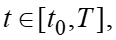 

1. Найти аналитическое решение задачи  
2. Составить  программу вычисления  решения  методом Эйлера с  заданной точностью, используя правило Рунге. 
Найти решение задачи с точностью   , число точек N и шаг, при котором точность достигается.    
Построить график решения.
3. Составить  программу вычисления  решения с  заданной точностью методом 
индивидуального варианта. 
Найти решение задачи с заданной точностью,   число точек N    
и шаг, при котором точность достигается.   
Построить график решения задачи.
4. Сравнить полученные результаты. 


Условия:  
$r(t) = cos(2t) + 0.1$,  
$y_0 = 1.783$,  
$t_0 = 0, T = \pi/2$

Аналитическое решение:
$(y =C_1e^{0.1t + 0.5sin(2t)}$ , C_1 = 1.783)   =>  
   
$y =1.783*e^{0.1t + 0.5sin(2t)}$

In [102]:
eps = 10**(-4)
t0 = 0
T = np.pi/2
y0 = 1.783

In [103]:
def r(t):
    return (np.cos(2*t) + 0.1)

def function(x, y):
    return r(x)*y

def analytical(x):
    return 1.783*np.exp(0.1*x + 0.5*np.sin(2*x))

def simple_euler(x_i, y_i, h, x_i_1):
    return y_i + h*function(x_i, y_i)

def method_runge(a, b, eps, y0, function, method, scale):
    h = 0.1
    h_2 = h / 2


    n = int((b - a) / h)
    n_2 = int((b - a) / h_2)
        
    n_2 = 2*n
    x_h = np.arange(a, b, h)
    x_h_2 = np.arange(a, b, h_2)
    y_list=[]
    y_2_list=[]
    #lmbd = lambda x, y: return y
    for i in range(x_h.shape[0]):
        if i==0:
            y_list = np.array([y0])
        else:
            y_list = np.append(y_list, method(x_h[i-1], y_list[i-1], h, x_h[i]))
            
    for i in range(x_h_2.shape[0]):
        if i==0:
            y_2_list = np.array([y0])
        else:
            y_2_list = np.append(y_2_list, method(x_h_2[i-1], y_2_list[i-1], h_2, x_h_2[i]))
            
              
    r = np.zeros((max(y_list.shape[0]*2, y_2_list.shape[0])))
    r = y_2_list[::2] - y_list    
    r = r / (2**scale - 1)
    history = []
    history.append(y_2_list)
    while (np.abs(r).max() > eps):
        #print(h)
        h = h_2
        h_2 = h / 2

        n = int((b - a) / h)
        n_2 = int((b - a) / h_2)
        
        n_2 = 2*n
        x_h = np.arange(a, b, h)
        x_h_2 = np.arange(a, b, h_2)
        
        y_list=y_2_list.copy()
        y_2_list=[]
        #lmbd = lambda x, y: return y

        for i in range(x_h_2.shape[0]):
            if i==0:
                y_2_list = np.array([y0])
            else:
                y_2_list = np.append(y_2_list, method(x_h_2[i-1], y_2_list[i-1], h_2, x_h_2[i]))
                
                
        r = np.zeros((max(y_list.shape[0]*2, y_2_list.shape[0])))
        r = y_2_list[::2] - y_list
        history.append(y_2_list)    
        r = r / (2**scale - 1)
    return x_h_2, y_2_list, h, r, n_2, history

In [104]:
x_result, y_result, h_result, r_result, n_result, history = method_runge(t0, T, eps, y0, function, simple_euler, 1)

In [105]:
print(f"Нужный для точности {eps} шаг : {h_result}")
print(f"Количество шагов для данного шага : {n_result}")
print(f"Точность до уточнения по правилу Рунге : {np.abs(y_result - analytical(x_result)).max()}")
print(f"Точность после уточнения по правилу Рунге : \
      {np.abs(y_result[::2] + r_result[::] - analytical(x_result)[::2]).max()}")

Нужный для точности 0.0001 шаг : 9.765625e-05
Количество шагов для данного шага : 32168
Точность до уточнения по правилу Рунге : 8.152725072863021e-05
Точность после уточнения по правилу Рунге :       4.268986053546087e-09


Как видим, точность после уточнения по Рунге выше, чего мы и ожидали.  
Ниже представлены графики первых 5 приближений

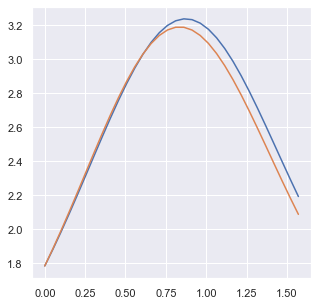

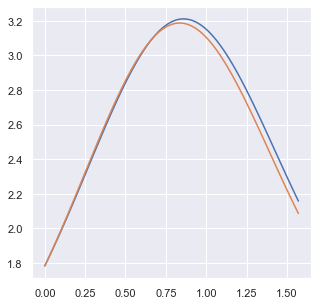

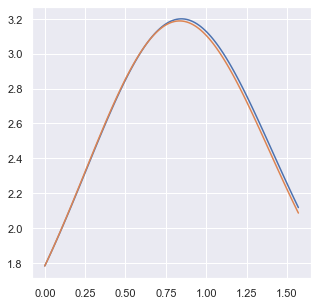

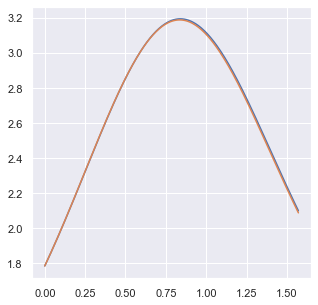

In [106]:
for i in history[:4]:
    fig, ax = plt.subplots(1,1,figsize=(5,5))
    x = np.linspace(t0,T,i.shape[0])
    ax.plot(x, i)
    ax.plot(x, analytical(x))

Данная формула : Интерполяционный метод адамса 2 порядка:
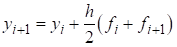  
Из данной формулы можно выделить явную:  

$y_{n+1} = \frac{y_n + \frac{h}{2}(r_n y_n)}{1 -  \frac{h}{2} r_{n+1}}$

In [107]:
def simple_adams2(x_i, y_i, h, x_i_1):
    return (y_i + h/2*function(x_i, y_i))/(1 - h/2*r(x_i_1))

In [108]:
x_result, y_result, h_result, r_result, n_result, history = method_runge(t0, T, eps, y0, function, simple_adams2, 2)

In [109]:
print(f"Нужный для точности {eps} шаг : {h_result}")
print(f"Количество шагов для данного шага : {n_result}")
print(f"Точность до уточнения по правилу Рунге : {np.abs(y_result - analytical(x_result)).max()}")
print(f"Точность после уточнения по правилу Рунге : \
      {np.abs(y_result[::2] + r_result[::] - analytical(x_result)[::2]).max()}")

Нужный для точности 0.0001 шаг : 0.0125
Количество шагов для данного шага : 250
Точность до уточнения по правилу Рунге : 3.466975742627554e-05
Точность после уточнения по правилу Рунге :       4.268017050890194e-10


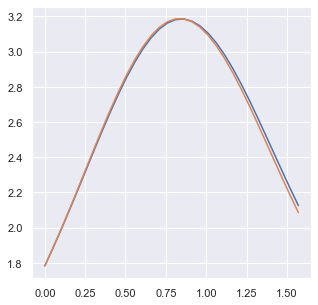

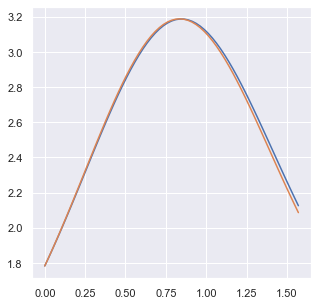

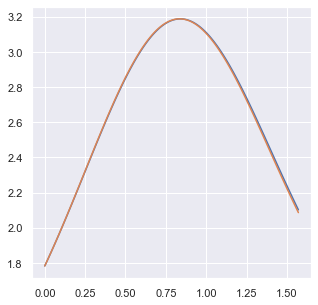

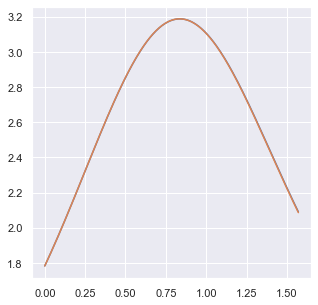

In [110]:
for i in history[:4]:
    fig, ax = plt.subplots(1,1,figsize=(5,5))
    x = np.linspace(t0,T,i.shape[0])
    ax.plot(x, i)
    ax.plot(x, analytical(x))

Как видим, шаг для метода Адамса потребовался меньший, чего мы и ожидали, так как он 2 порядка точности, а метод Эйлера - первого.